<a href="https://colab.research.google.com/github/mohdraavi/LSTM/blob/main/keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical #for one hot encoding
from keras.datasets import mnist   #for loading dataset of digits

from IPython.display import SVG

In [21]:
from tensorflow.keras.utils import plot_model  #to plot each layer

In [5]:
!pip install livelossplot

In [3]:
import numpy as np

In [7]:
import livelossplot  #for visualizing the output how loss function and accuracy increasing and descreaing
plot_losses = livelossplot.PlotLossesKeras()

%matplotlib inline

NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS= 10


In [8]:
def data_summary(X_train,y_train,X_test, y_test):
  print("Train images shape:",X_train.shape)
  print("Train labels shape:",y_train.shape)
  print("Test images shape:",X_test.shape)
  print("Test labels shape:",y_test.shape)
  print('Train labels: ',y_train)
  print('Test labels:', y_test)

In [9]:
(X_train, y_train),(X_test,y_test) = mnist.load_data()

#Checking state of dataset
data_summary(X_train,y_train,X_test,y_test)

11490434/11490434 [==============================] - 0s 0us/step
Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Train labels:  [5 0 4 ... 5 6 8]
Test labels: [7 2 1 ... 4 5 6]


In [10]:
#Reshaping the data
X_train = X_train.reshape((X_train.shape[0],NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0],NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255

In [11]:
#categorically encode the data
y_train = to_categorical(y_train,NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [12]:
#CHECK STATE OF DATASET
data_summary(X_train,y_train,X_test,y_test)

Train images shape: (60000, 784)
Train labels shape: (60000, 10)
Test images shape: (10000, 784)
Test labels shape: (10000, 10)
Train labels:  [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Test labels: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
#building neural network
model = models.Sequential()
model.add(Dense(512,activation='relu',input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

In [15]:
#compile model
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics='accuracy') #to tune the model we use compile



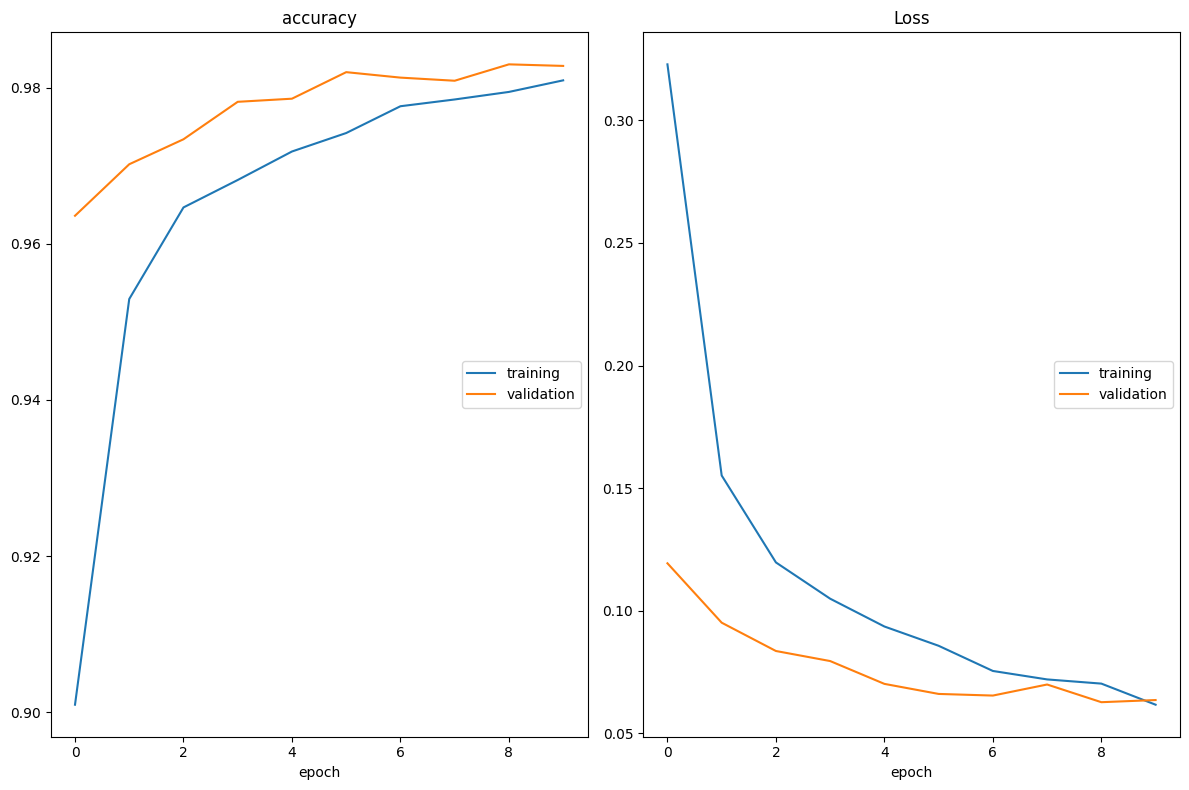

accuracy
	training         	 (min:    0.901, max:    0.981, cur:    0.981)
	validation       	 (min:    0.964, max:    0.983, cur:    0.983)
Loss
	training         	 (min:    0.062, max:    0.323, cur:    0.062)
	validation       	 (min:    0.063, max:    0.119, cur:    0.064)
469/469 [==============================] - 8s 17ms/step - loss: 0.0616 - accuracy: 0.9809 - val_loss: 0.0636 - val_accuracy: 0.9828


In [16]:
#Train model
model.fit(X_train,y_train,
          batch_size=BATCH_SIZE,
          epochs = EPOCHS,
          callbacks = [plot_losses],
          verbose=1,
          validation_data=(X_test,y_test)
          )

#Epochs:
 An epoch is one complete pass through the entire training dataset during the training of a neural network.

 In deep learning, the training process involves iteratively updating the model's parameters (weights and biases) to minimize the loss function, which measures the error between the model's predictions and the actual target values.

#Batch size:

Batch size refers to the number of training examples that are used in one forward and backward pass through the neural network during each training iteration.

Instead of processing the entire training dataset in one go, which can be computationally expensive and memory-intensive, the data is divided into smaller batches. The model's parameters are updated after processing each batch.

Epochs refer to the number of times the model sees the entire training dataset, whereas batch size determines how many examples are processed in each forward and backward pass.

#verbose:

"verbose" is a parameter that controls the amount of information and logging that is displayed during the training of a neural network. It is often used when fitting (training) a model using the fit function. The "verbose" parameter typically takes an integer value, and its primary purpose is to control the level of detail in the training output. The possible values for the "verbose" parameter are commonly:


verbose=0: This setting means no output will be displayed during training. It's typically used when you want to train your model silently, without any progress updates.


verbose=1: This is the default setting. It displays a progress bar and information about the current training epoch. You'll see information about the training loss and any specified metrics, as well as the progress through each epoch.


verbose=2: This setting displays training progress without the progress bar. You'll still get information about the current epoch, training loss, and metrics, but it won't include the visual progress bar.

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# #output network visulizatoin
# SVG(plot_model(model).create(prog='dot',format='svg'))

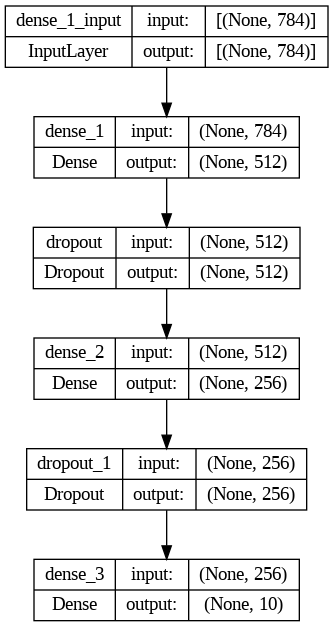

In [23]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

#Steps:

1. Loading libraries
2. loading the dataset
3. reshaping the dataset
4. categorical encoding of label(target)
5. chosing the hyperparamters values
6. Model building
7. Model compilation
8. Model training
9. Checking model summary
10. model plotting